<center><img src="images/ML_video_w_s.webp" style="margin: 20 auto;"></center>
<p style="font-family: Protomolecule; font-size: 2.3em; line-height: 90%; margin: 0 auto; text-align: center; width: 100%;"><span style="letter-spacing: .1rem;">Machine</span><br><span style="letter-spacing: -.1rem;">Learning</span></p>
<p class="author" style="font-family: Protomolecule; margin: 0px auto;  text-align: center; width: 100%; font-size: 1.2em;">Joern Ploennigs</p>
<p class="subtitle" style="font-family: Protomolecule; font-size: larger; margin: 1em auto; text-align: center; width: 100%; font-size: 1.2em;">Visuelle Datenanalyse</p>

# Visuelle Datenanalyse

![](images/midjourney_visualizing_data.png)
> Die wahre Entdeckungsreise besteht nicht darin, neue Landschaften zu suchen, sondern darin, neue Augen zu haben.
> 
> — Marcel Proust

Die Visualisierung von Daten ist meist eine der ersten Schritte in deren Analyse. Ziel ist es sich vertrauter mit den Daten zu machen und einfache Zusammenhänge visuell zu identifizieren. Dabei nutzen wir aus, dass der Mensch den Großteil seiner Informationen visuell aufnimmt und sehr gut in der Mustererkennung ist. 

## <a href="/lec_slides/08_Visual_Analytics.slides.html">Folien</a>
<iframe src="/lec_slides/08_Visual_Analytics.slides.html" width="750" height="500"></iframe>

## Passende Diagramme


Dies kann man geziehlt durch passende Diagramme forcieren. Die folgende Tabelle stellt passende Diagramme entsprechend der Zielstellungen und der Anzahl und des Datentyps der darzustellen Variablen vor. Diese werden wir im weiteren Verlauf im Einzelnen diskutieren.

|                  | **Einzelne Variable** |                 | **Mehrere Variablen** |                   |                       |
|------------------|-----------------------|-----------------|-----------------------|-------------------|-----------------------|
| _Ziel_           | **Numerisch**         | **Kategorisch** | **Numerisch**         | **Kategorisch**   | **Gemischt**          |
| Trend            | Line plot             | Heatmap         | Line plot             | Heatmap           | Heatmap               |
| Saisonalität     | Line plot             | Heatmap         | Line plot             | Heatmap           | Heatmap               |
| Autokorrelation  | Line plot             | Heatmap         | Line plot             | Heatmap           | Heatmap               |
| Kreuzkorrelation | Line plot             | Heatmap         | Scatter plot          | Bar chart         | Strip plot, Box plot  |
| Verhältnisse     | Area plot             | Pie chart       | Area plot             | Stacked Bar chart | Strip plot            |
| Verteilung       | Histogramm            | Pie chart       | Density Heatmaps      | Bar chart         | Box plot, Violin plot |
| Streuung         | Histogramm            | Bar chart       | Scatterplot           | Bar chart         | Strip plot            |

Python hat viele Plotting-Bibliotheken um diese Diagramme zu erzeugen. Hier diskutieren wir eine der einfachsten namentlich _Plotly_. Plotly ist eine Open-Source-Bibliothek zur Datenvisualisierung, mit der sich interaktive, webbasierte Diagramme und Dashboards erstellen lassen. Sie ist eine beliebte Wahl für Python-Entwickler, da sie einfach zu bedienen ist und eine große Auswahl an Diagrammtypen und Anpassungsmöglichkeiten bietet.

Wir gehen davon aus, dass Sie die folgenden Module importiert haben:

In [1]:
import numpy as np # Import von NumPy
import pandas as pd # Import von Pandas
np.random.seed(10) # Fixierung des Zufallszahlgenerators zur beseren Erklärung

Zudem laden wir Plotly Express als `px`. Plotly Express enthält Funktionen, mit denen man sehr schnell ganze Diagramme auf einmal erstellen kann. Dabei nutzt Plotly Express intern alle Elemente aus Plotly, so dass die Diagramme mit den umfangreichen Funktionen von Plotly auch erweitert werden können. Genauso lassen sich die Plotly Express Diagramme auch durch Plotly erzeugen, jedoch mit 5- bis 100-mal mehr Code.

Deshalb eignet sich Plotly Express insbesondere für einfache und schnelle Datenexploration.

In [3]:
import plotly.express as px

Als Beispiel für die Visualisierung laden den schon bekannten Wetterdatensatz des DWD für Warnemünde. Bevor man versucht Datensätze zu visualisieren, lohnt sich immer den Dataframe mit `head` anzusehen, so dass man sieht welche Spalten und Werte verfügbar sind.

In [4]:
egywth = pd.read_csv("../data/UROS/Energy1D_weather_clean.csv", parse_dates=[0])
egywth.head()

Date  EV_HT_740  EV_NT_740  E_AV_Lab  E_SV_Lab  ES_Lab    DATUM_DT  \
0 2020-12-30        NaN        NaN       NaN       NaN     NaN  2020-12-30   
1 2020-12-31        NaN        NaN    1256.0     291.0     5.0  2020-12-31   
2 2021-01-01        0.0     4080.0    1221.0     290.0     1.0  2021-01-01   
3 2021-01-02     1170.0     2630.0    1243.0     284.0     2.0  2021-01-02   
4 2021-01-03        0.0     3750.0    1222.0     283.0     2.0  2021-01-03   

   STATIONS_ID  MESS_DATUM  QN_3  ...  TMK   UPM  TXK  TNK  TGK  eor  \
0       4271.0  20201230.0  10.0  ...  4.0  81.0  4.6  2.9  2.2  eor   
1       4271.0  20201231.0  10.0  ...  3.4  83.0  4.4  2.3  0.9  eor   
2       4271.0  20210101.0  10.0  ...  2.0  90.0  3.0  1.1  0.3  eor   
3       4271.0  20210102.0  10.0  ...  3.3  95.0  4.0  2.6  2.0  eor   
4       4271.0  20210103.0  10.0  ...  3.5  81.0  4.6  2.4  0.8  eor   

   TemperaturKlasse  HeizKuehlTage                            QNS_4  QNF_4  
0              Cold    Heizgradtag  nicht alle Parameter korrigiert      5  
1              Cold    Heizgradtag  nicht alle Parameter korrigiert      5  
2              Cold    Heizgradtag  nicht alle Parameter korrigiert      5  
3              Cold    Heizgradtag  nicht alle Parameter korrigiert      5  
4              Cold    Heizgradtag  nicht alle Parameter korrigiert      5  

[5 rows x 30 columns]

## Liniendiagramme (Line chart)

Ein Liniendiagramm ist eine x-y-Diagramm, das die Beziehung zwischen zwei quantitativen Variablen darstellt, wobei die Punkte, die zu derselben x-y-Gruppe gehören durch Linien verbunden werden. 

Liniendiagramme eignen sich besonders zur Darstellung von Zeitreihen oder Sequenzen und erlauben die Erkennung von Trends (Korrelation), Autokorrelation, Saisonalitäten (Schwingungen) und die Autokorrelation. 

Die Steigung der Linie im Mittel zeigt Trens auf, was ein Zeichen für die Korrelation zwischen x- und y-Werten ist.
* Steigt die Linie im Mittel so liegt ein Aufwärtstrend vor, das heißt die y-Werte sind positiv mit den x-Werten (z.B. der Zeit) korreliert.
* Fällt die Linie so liegt eine negative Korrelation vor, d.h. die y-Werte fallen mit steigenden x-Werten.
* Bleibt die Linie flach, so liegt kein Trend vor.

Als Saisonalitäten bezeichnet man sich wiederholende Muster oder Schwankungen. Sie deuten auf Frequenzabhängigkeit der `y`-Werten von den `x`-Werten hin. Es können dabei mehrere Frequenzen sichtbar sein. So findet man bei natürlichen Zeitreihen zum Beispiel Jahres oder Tagesschwankungen.

Eine hohe Autokorrelation erkennt daran das nachfolgende Werte sich nicht stark von den direkten Vorgängerwerten unterscheiden.

Wir können Liniendiagramme in Plotly mit `px.line` erstellen. Man gibt immer zuerst den Dataframe an und spezifiziert dann die Spaltenamen der Werte die  als `x` und `y` verwendet werden sollen.

/Users/jploennigs/miniconda3/envs/lehre/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


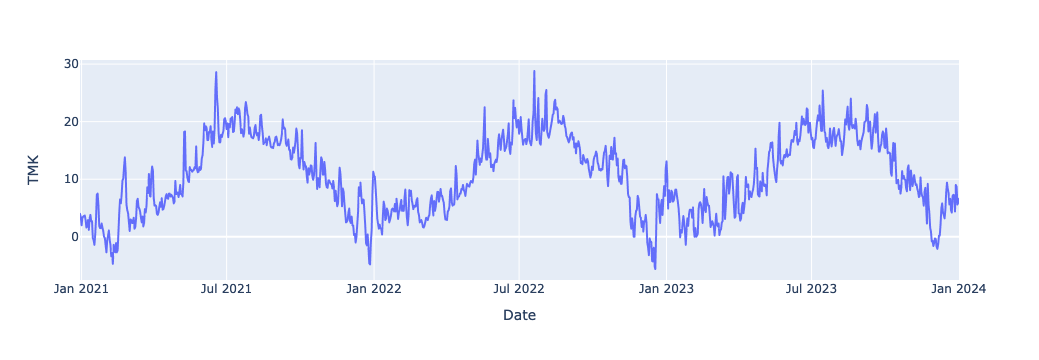

In [5]:
px.line(egywth, x="Date", y="TMK")

Für unser Beispiel können wir erstmal keinen klaren Aufwärtstrend erkennen. Stattdessen sehen wir die Saisonalitäten im Jahr sehr gut, also das Temperaturen im Winter niedriger und im Sommer höher sind. Wir erkennen auch, dass es Schwingungen im Wochentakt gibt, wo sich das Wetter langsam durch wechselnde Hoch- und Tiefeinflüsse ändert. Hätten wir Stundenwerte würden wir auch die Tagessaisonalität sehen, da es nachts kälter ist.

Für die Autokorrelation zoomen wir uns die letzten 30 Tage rein. Das können wir, indem wir mit der Maus in dem Diagramm oben über die letzten 30 Tage ziehen. Dann zoomt er in diesen Bereich (mit Doppelklick können wir wieder raus zoomen). Diese Interaktivität ist ein sehr großer Vorteil von Plotly.

Wir können in dem Liniendiagramm auch mehrere Zeitreihen gleichzeitig anzeigen, indem wir als `y`-Werte mehrere Spalten angeben. Wollen wir zum Beispiel neben dem Mittelwert, die maximale und minimale Temperatur anzeigen, so können wir das mit:

/Users/jploennigs/miniconda3/envs/lehre/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



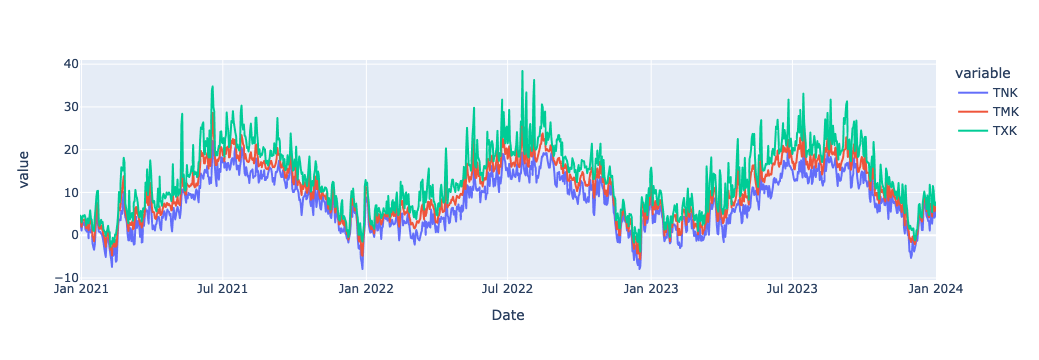

In [6]:
px.line(egywth, x="Date", y=["TNK", "TMK", "TXK"])

Diese Darstellung ist etwas unübersichtlich. In solchen Fällen empfiehlt es sich die Zeitreihen nebeneinander in einzelnen Facetten darzustellen. Hierfür gibt es die Option `facet_row` (oder `facter_col`). Hierfür müssen wir den Datensatz in eine Reihendarstellung bringen, die wir im Abschnitt [Dataframes Transformieren](df-transform) kennen gelernt haben.

In [7]:
import plotly.express as px
egywth_melt=egywth.melt(id_vars=['Date', "TemperaturKlasse"], value_vars=["TXK","TMK","TNK"])
px.line(egywth_melt, x="Date", y="value", facet_row ="variable")

/Users/jploennigs/miniconda3/envs/lehre/lib/python3.11/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/Users/jploennigs/miniconda3/envs/lehre/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



Hier erkennen wir auch leichte Unterschiede zwischen dem minimal und maximal Werten (TNK, TXK) die stärker variieren als die mittlere Temperatur (TMK). Das ist auf die niedrigere Robustheit von Min und Max versus dem Mittelwert zurückzuführen, die wir im  [Statistikteil](06_Descriptive_Statistics.ipynb) diskutiert haben.

In Facetten lassen sich auch Werte mit unterschiedlichen Skalen nebeneinander gut darstellen. Zum Beispiel die Temperatur mit dem Energieverbrauch "ES_Lab", wo wir eine erkennbare Parallelität sehen, allerdings mit einer zeitlichen Verschiebung, da die Energie der Temperatur ca. 30 Tage voran schreitet.

In [8]:
egywth_melt=egywth.melt(id_vars=['Date', "TemperaturKlasse"], value_vars=["TMK", "ES_Lab"])
px.line(egywth_melt, x="Date", y="value", facet_row ="variable").update_yaxes(matches=None)

/Users/jploennigs/miniconda3/envs/lehre/lib/python3.11/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/Users/jploennigs/miniconda3/envs/lehre/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



## Flächendiagramme (Area chart)

Flächendiagramme sind Liniendiagrammen, bei denen die Fläche unter der Linie gefüllt ist. Sie sind dann sinnvoll, wenn es um die Visualisierung dieser Fläche geht, z.B. bei Integralen, Wahrscheinlichkeitsverteilungen. Zu beachten ist, dass die Flächen standartmäßig aufaddiert werden (stacking). Damit kann man zum Beispiel unterschiedliche Energieverbräuche gut visualisieren.

Flächendiagramme sind genauso wie Liniendiagramme zu benutzen.

In [9]:
px.area(egywth, x='Date', y=["EV_HT_740", "EV_NT_740", "E_AV_Lab", "E_SV_Lab", "ES_Lab"])

/Users/jploennigs/miniconda3/envs/lehre/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In dem Flächendiagramm erkennt man gut, dass "EV_HT_740" am 18. Oktober 2022 mit auf "EV_NT_740" aufgeschaltet wurde und danach 0 ist. Dadurch singt der Gesamtverbrauch (die Gesamtfläche) nicht. Weiter erkennen wir die Abfälle im Energieverbrauch zum Jahreswechsel. Auch fehlen Daten zwischen 11. Mai und 19. Mai 2022.

## Heatmaps

Heatmaps eignen sich zur Visualisierung von kategorischen Zeitreihen. Hierbei geht es genauso um die Erkennung von Saisonalität, Korrelation und Trends. Sie können auch für numerische Zeitreihen verwendet werden, wenn insbesondere die Mustererkennung im Vordergrund steht.

Hierfür verwendet man in Plotly die Funktion `imshow`. Sie ist eigentlich dazu da 2D Bilder darzustellen und akzeptiert deshalb nur eine Matrix an Werten. Diese können wir aus dem Datensatz erzeugen durch Auswahl spezifischer Spalten und Transposition dieser

In [10]:
px.imshow(egywth[["EV_HT_740", "EV_NT_740", "E_AV_Lab", "E_SV_Lab", "ES_Lab"]].T, x=egywth["Date"], color_continuous_scale='Viridis')

/Users/jploennigs/miniconda3/envs/lehre/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



Dadurch kann man nun gut die wöchentliche Saisonalität im Energieverbrauch sehen. Ferner erkennen wir, dass am Wochenende vor Oktober 2022 bereits, immer "EV_HT_740" auf "EV_NT_740" umgelegt wird.

Dies können wir auch für kategorische Variablen nutzen. Hierfür müssen wir allerdings diese in eine numerische Darstellung überführen.
 In dem Abschnitt [Konvertierung kategorischer Variablen](konvert-categorical-vars) haben wir kennen gelernt, dass das mit der Funktion `factorize` geht.

In [11]:
TK_Fact, TK_Map = pd.factorize(egywth.TemperaturKlasse) # Wandel die kategorische Variable in eine Numerische um
TK_Fact = np.array([TK_Fact]) # Wandel die Serie in eine Matrix um, die von imshow erwartet wird
px.imshow(TK_Fact, x=egywth["Date"])

/Users/jploennigs/miniconda3/envs/lehre/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



## Streudiagramme (Scatterplot)

Ein Streudiagramm oder Punktewolke ist ein Diagramm, bei dem eine numerische Variable `y` über einer numerischen Variable `x` als Punkt dargestellt wird.

Das Streudiagramm eignet sich besonders zur Visualisierung der Korrelation und deren Streuung zwischen beiden Variablen. Im Gegensatz zu Liniendiagrammen werden zwischen aufeinander folgenden Werten keine Linien gezogen. Dadurch blendet man saisonale Aspekte und Autokorrelation bewusst aus.

Scatterplots können genauso verwendet werden, wie Liniendiagramme in Plotly (Liniendiagramme sind ein Untertyp von Scatterplots). Prinzipiell können wir damit auch Zeitreihen der Temperatur visualisieren.

In [12]:
px.scatter(egywth, x="Date", y="TMK")

Dabei zeigt sich, dass Saisonalität und Autokorrelation schlechter zu erkennen sind und die Streuung stärker betont wird.

Die Stärke von Scatterplots offenbart sich, wenn man damit keine Zeitreihen visualisiert, sondern numerische Variablen vergleicht. Vergleichen wir zum Beispiel die Entwicklung der minimalen und maximalen Temperatur im Vergleich zur mittleren Tagestemperatur.

In [13]:
px.scatter(egywth, x="TMK", y=["TNK", "TXK"], opacity=.2) # es empfieht sich bei vielen Werten die opacity zu reduzieren

/Users/jploennigs/miniconda3/envs/lehre/lib/python3.11/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



Jetzt ist der wenig überraschende lineare Zusammenhang zwischen den Variablen gut zu erkennen.

Interessanter ist es, wenn wir uns den Zusammenhang zwischen der Temperatur und dem Dampfdruck ansehen, welcher mist wie stark Wassermoleküle versuchen, von einer Oberfläche in die Luft überzugehen.

In [14]:
px.scatter(egywth, x="TMK", y="VPM", opacity=.3)

Hier sehen wir einen exponentiellen Zusammenhang. Der ist erklärbar, da an warmen Tagen, die Wassermoleküle mehr Energie haben und somit eher verdampfen. Jetzt könnte man annehmen, dass deshalb an warmen Tagen auch die Luftfeuchtigkeit höher ist. Wenn wir nachschauen, sehen wir, dass sich diese Annahme in unserem Datensatz nicht bestätigt wird. Zur Verdeutlichung nutzen wir die kategorische Variable `TemperaturKlasse`

In [15]:
px.scatter(egywth, x="TMK", y="UPM", opacity=.2)

Betrachten wir den zuvor entdeckten Zusammenhang zwischen der Temperatur und der Energie "ES_Lab" ansehen. Hier sehen wir, dass der im Linienplot sichtbare Zusammenhang nicht mehr so klar zu erkennen ist, das liegt an der zuvor diskutierten zeitlichen Verschiebung. So eine Verschiebung ist beim Trainieren von ML-Modellen später problematisch, wenn sie nicht adressiert wird, weil das Modell diesen Zusammenhang nicht erkennen kann.

In [16]:
px.scatter(egywth, x="TMK", y="ES_Lab", opacity=.2)

All diese Untersuchungen macht man meist gemeinsam, indem man ein Streudiagrammatrix über alle numerischen Daten in einem Datensatz plottet. Hierfür bietet Plotly die Funktion

In [17]:
px.scatter_matrix(egywth, dimensions=["TMK", "VPM", "UPM", "ES_Lab"], opacity=.1)

Hier sehen wir in der Diagonalen immer einen linearen Zusammenhang, da die Werte der gleichen Variable auf sich selbst abgebildet werden. Interessant sind die obere oder die untere Dreiecksmatrix, wo man nach lernbaren Zusammenhängen sucht.

## Balkendiagramme

Balkendiagramm verwendet man zur Darstellung von kategorischen Werten. Hierbei werden auf der `x`-Achse die Kategorien gelistet und darüber auf der `y`-Achse ein rechteckiger Balken, der die Häufigkeit, Proportionen oder andere Werte für jede Kategorien darstellt. 

Balkendiagramme eignen sich besonders gut, um Häufigkeiten von Kategorien und Kreuzkombination dieser zu vergleichen. 

Plotly bietet hierfür die Funktion `px.bar`. Man kann sie einfach mit einer Kategorie aufrufen, allerdings ist das Ergebnis nicht sehr lesbar, weil Plotly die Häufigkeit nicht aufaddiert.

In [18]:
px.bar(egywth, x='TemperaturKlasse')

Deshalb müssen wir die Anzahl vorher zählen, was wir mit einer Gruppierung via `groupby` und der Zählung via `count` der Spalte bestimmen können.

In [19]:
egywth_tmpcls=egywth[["Date","TemperaturKlasse"]].groupby("TemperaturKlasse").count().reset_index()
egywth_tmpcls

TemperaturKlasse  Date
0             Cold   659
1             Cool   260
2             Mild   170
3             Warm     9

In [20]:
px.bar(egywth_tmpcls, x='TemperaturKlasse', y="Date")

Boxplots eignen sich auch um Kreuzkombination von Kategorien zu untersuchen. Zum Beispiel wollen wir wissen in welchen Monaten welche Temperaturklassen auftreten. Dafür erzeugen wir uns eine Spalte Monat und beziehen diese in unsere Aggregation mit ein.

In [21]:
egywth["Monat"]=egywth.Date.dt.month

egywth_tmpclsM=egywth[["Date","TemperaturKlasse","Monat"]].groupby(["TemperaturKlasse","Monat"]).count().reset_index()
egywth_tmpclsM.head()

TemperaturKlasse  Monat  Date
0             Cold      1    93
1             Cold      2    83
2             Cold      3    93
3             Cold      4    89
4             Cold      5    54

Anstatt dass wir jetzt jede Kombination zusammenführen müssen, können wir die neue Spalte einfach als `color` Parameter in dem Balkendiagramm mit angeben. Plotly coloriert jetzt automatisch die unterschiedlichen Kategorien

In [22]:
px.bar(egywth_tmpclsM, x='TemperaturKlasse', y="Date", color="Monat") # durch setzen von color erhalten wir auch farbliche kategorien

In [23]:
egywth_tmpclsM=egywth[["Date","HeizKuehlTage","TemperaturKlasse"]].groupby(["TemperaturKlasse","HeizKuehlTage"]).count().reset_index()
egywth_tmpclsM.head()

TemperaturKlasse HeizKuehlTage  Date
0             Cold   Heizgradtag   659
1             Cool   Heizgradtag    81
2             Cool     Normaltag   179
3             Mild   Kühlgradtag    22
4             Mild     Normaltag   148

In [24]:
px.bar(egywth_tmpclsM, x='TemperaturKlasse', y="Date", color="HeizKuehlTage") # durch setzen von color erhalten wir auch farbliche kategorien

/Users/jploennigs/miniconda3/envs/lehre/lib/python3.11/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



## Tortendiagramme

Tortendiagramme sind eine Alternative zu Balkendiagrammen die insbesondere Verwendet werden, wenn die Proportionen zwischen den Werten wichtig sind. Sie erlauben allerdings nicht Kreuzkombinationen von Kategorien darzustellen.

In [25]:
px.pie(egywth_tmpcls, names='TemperaturKlasse', values="Date")

## Histogramme

Histogramme sind eine besondere Art von Balkendiagramm, wobei die Länge jedes Balkens auf der `y`-Achse die Häufigkeit oder den Anteil der Datenpunkte in einem bestimmten Bereich oder Intervall auf der `x`-Achse darstellen. Sie werden benutzt, um die Verteilungsfunktion einer Variable zu analysieren.

Als erstes schauen wir uns die Verteilung des Luftdrucks.

In [26]:
px.histogram(egywth, x="PM")

Wir sehen hier schön ausgeprägte Normalverteilung, die leicht Linkslastig ist.

Bei der Temperatur ergibt sich eine bimodale Normalverteilung, d.h. eine Verteilung, die aus zwei überlagerten Normalverteilungen mit individuellen Maxima besteht.

In [27]:
px.histogram(egywth, x="TMK")

Der Energieverbrauch "ES_Lab" ist eher Gammaverteilt, da er oft 0 ist, wenn keine Last anliegt.

In [28]:
px.histogram(egywth, x="ES_Lab")

Auch hier können wir mehrere Spalten angeben, um die Histogramme zu vergleichen. So sehen wir zum Beispiel, dass "E_AV_Lab" und "E_SV_Lab" beide Normalverteilt sind. Hierfür erhöhen wir die Anzahl der Bins mit `nbins`.

In [29]:
px.histogram(egywth, x=["E_AV_Lab", "E_SV_Lab"], nbins=200)

/Users/jploennigs/miniconda3/envs/lehre/lib/python3.11/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



## Boxplots

Boxplots werden verwendet, um die Verteilungsform von Variablen in der Abhängigkeit von anderen meist kategorischen Variablen zu analysieren. In diesen Fällen werden Histogramme zu unübersichtlich und man reduziert das Histogramm auf die wichtigen statistischen Kenngrößen und zeigt diese in Form einer Box.

Um diese zu verstehen, visualisieren wir den Boxplot mal direkt über dem Histogramm des Luftdrucks.

In [30]:
px.histogram(egywth, x="PM", marginal="box")

Schauen wir uns den Aufbau genauer an:

* Die Box: erstreckt sich von Quartil 1 bis Quartil 3, die wir aus dem Teil der [Statistische Datenanalyse](06_Descriptive_Statistics.ipynb) kennen gelernt. Das Quartil 1 (Q1) ist der Wert, unterhalb dessen sich 25% der Datenpunkte befinden, während Quartil 3 (Q3) der Wert ist, unterhalb dessen sich 75% der Datenpunkte befinden. Eine breite Box deutet an, dass die Werte sehr breit streuen.
* Der Median wird durch einen Strich innerhalb der Box dargestellt. Es ist der Wert, der die Daten in zwei Hälften teilt, wobei 50% der Datenpunkte unterhalb und 50% oberhalb dieses Wertes liegen. Ist der Strich näher an der oberen Grenze der Box, ist die Verteilung rechts-schief, liegt er unten, ist sie links-schief verteilt.
* Die Antennen (Whisker): Die Linien, die von der Box abgehen, heißen Whisker. Sie zeigen die Spannweite der Daten, die noch nicht als Ausreißer gelten. Ihr Ende markiert in der Regel den größten Wert, der innerhalb von 1,5-fachen des Interquartilsabstands (Differenz zwischen Q3 und Q1) vom Q1 bzw. Q3 entfernt liegt.
* Ausreißer: Datenpunkte, die außerhalb der 1,5-fachen Interquartilsabstands-Grenze liegen, werden als kleine Kreise oder Sterne oberhalb oder unterhalb der Whisker dargestellt.


Mit einem Boxplot kannst du also auf einen Blick erkennen:

* Wie die Daten verteilt sind (symmetrisch, links- oder rechts-schiefe Verteilung)
* Wo der Median liegt (zentraler Wert)
* Wie groß die Streuung der Daten im mittleren Bereich ist (Länge der Box)
* Ob es Ausreißer gibt (Kreise oder Sterne außerhalb der Whisker)

Boxplots sind besonders praktisch, wenn du mehrere Datensätze miteinander vergleichen werden. Durch das Nebeneinanderstellen mehrerer Boxplots kann man schnell erkennen, in welchem Datensatz die Verteilung am meisten gestreut ist, wo die Medianwerte liegen oder ob es in einem Datensatz mehr Ausreißer gibt.

Analysieren wir noch einmal den Zusammenhang zwischen dem Energieverbrauch "ES_Lab" und den Temperaturkategorien, so sehen wir wieder das bereits im Scatterplot beobachtete Verhalten.

In [31]:
px.box(egywth, x="TemperaturKlasse", y="ES_Lab")

Boxplots erlauben es dabei vor allem mehrere Kreuzkombinationen von kategorischen Variablen zu visualisieren. Zum Beispiel wollen wir wissen wie der Energieverbrauch in welchen Monaten und Temperaturklassen verteilt.

In [32]:
px.box(egywth, x="TemperaturKlasse", y="ES_Lab", color="Monat")

/Users/jploennigs/miniconda3/envs/lehre/lib/python3.11/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



## Violindiagramme

Violindiagramme sind eine Alternative zu Boxplots bei denen die Verteilungsdichte aus dem Histogramm anstatt der Box anzeigt wird, was meist einer Violine gleicht.

In [33]:
px.violin(egywth, x="TemperaturKlasse", y="ES_Lab")

## Streudiagramme (Strip)

Eine weitere Alternative zu Boxplots sind Streudiagramme. Sie kombinieren die Idee von Scatterplots mit dem des Violinplots und ergeben ein Scatterplot mit kategorischen Variablen. Hierbei werden die Variablenwerte über den Kategorien so aufgetragen, dass sie sich minimal in `x` überlagern.

In [34]:
px.strip(egywth, x="TemperaturKlasse", y="ES_Lab")

## Plots formatieren und abspeichern

Plotly bietet viele Funktionen um die erzeugten Diagramme zu formatieren und abzuspeichern.

Dafür ist es sinnvoll als erstes, das Diagramm einer Variable zuzuweisen, z.B. `fig`. 

In [35]:
fig = px.line(egywth, x="Date", y="TMK")

/Users/jploennigs/miniconda3/envs/lehre/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



Für die Abbildung `fig` können wir nun einen Titel und Achsenbeschriftungen festlegen. Dabei können wir HTML-Tags zur Formatierung benutzen.

In [36]:
fig.update_layout(title="<b>Wetterstation:</b> Rostock-Warnemuende",
                  xaxis_title="Datum",
                  yaxis_title="Tagesmittel der <br> Lufttemperatur in °C")

Jetzt können wir die Schriftarten ändern und die fertige Abbildung darstellen.

In [37]:
fig.update_layout(
    title_font=dict(size=16, family="Times New Roman", color="darkblue"),
    font_family="Times New Roman",
    font_color="green",
)
fig.show()

Diese Abbildung können wir nun mit `write_image` abspeichern:

In [38]:
fig.write_image("temperaturverlauf.png")

In [39]:
import os
if os.path.exists("temperaturverlauf.html"):
  os.remove("temperaturverlauf.html")
if os.path.exists("temperaturverlauf.pdf"):
  os.remove("temperaturverlauf.pdf")
if os.path.exists("temperaturverlauf.png"):
  os.remove("temperaturverlauf.png")

<div id="tsparticles_question" style="width: 100%; height:5em; background-color: white;">
    <div class="questions" style="letter-spacing: 0.03em; font-family: Protomolecule; font-size: 2.3em; position: absolute; top: 50%; left: 50%; transform: translate(-50%, -50%); color: black; z-index: 5;">f&nbsp;&nbsp;r&nbsp;&nbsp;a&nbsp;&nbsp;g&nbsp;&nbsp;e&nbsp;&nbsp;n&nbsp;&nbsp;?</div>
</div>